In [7]:
import numpy as np
import torch
import torch.nn.functional as F
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from pathlib import Path

from au2v.analyst import Analyst
from au2v.config import ModelConfig, TrainerConfig
from au2v.dataset_manager import load_dataset_manager
from au2v.trainer import PyTorchTrainer
from au2v.model import load_model

In [8]:
torch.manual_seed(0)
np.random.seed(0)

trainer_config = TrainerConfig(
    dataset_name="toydata-small",
    epochs=0,
    ignore_saved_model=True,
    load_model=True,
    batch_size=64,
    model_dir="../cache2/model/",
    dataset_dir="../cache/dataset/",
    load_dataset=False,
)
model_config = ModelConfig(
    d_model=128, lr=0.0001, init_embedding_std=0.2, window_size=5
)

In [9]:
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
    data_dir="../data/"
)

dataset_manager does not exist at: ../cache/dataset/toydata-small.pickle, create dataset
num_seq: 500, num_item: 45, num_item_meta: 8, num_seq_meta: 7, num_item_meta_types: 2, num_seq_meta_types: 2
to_sequential_data start


100%|██████████| 500/500 [00:00<00:00, 2759.21it/s]


to_sequential_data end
to_sequential_data start


100%|██████████| 500/500 [00:00<00:00, 2551.92it/s]


to_sequential_data end
dumping dataset_manager to: ../cache/dataset/toydata-small.pickle
dumped dataset_manager to: ../cache/dataset/toydata-small.pickle


In [10]:
model = load_model(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config
)
trainer = PyTorchTrainer(
    model=model,
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)
analyst = Analyst(
    dataset_manager=dataset_manager,
    model=trainer.model
)

load_state_dict from: ../cache2/model/toydata-small/attentive.pt


In [11]:
seq = analyst.seq_embedding
seq_meta = analyst.seq_meta_embedding
item_meta = analyst.item_meta_embedding

In [12]:
seq_keys = ["u_4_M_20_50_M5", "u_1_M_20_50_M2", "u_38_M_20_50_M4"]
seq_meta_keys = ["gender:M", "gender:F", "age:20", "age:30", "age:40", "age:50", "age:60"]
item_meta_keys = ["genre:M", "genre:E", "genre:F", "year:1960", "year:1970", "year:1980", "year:1990", "year:2000"]

In [13]:
# plt.rcParams["font.family"] = "Osaka" # or "Hiragino Mincho ProN"
# plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.subplot.bottom'] = 0.30 # なんか保存する時にx軸のラベルが見切れるので、下の余白を調整
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["cyan", "white", "hotpink"])
cmap = "OrRd"
# plt.rcParams["font.size"] = 16

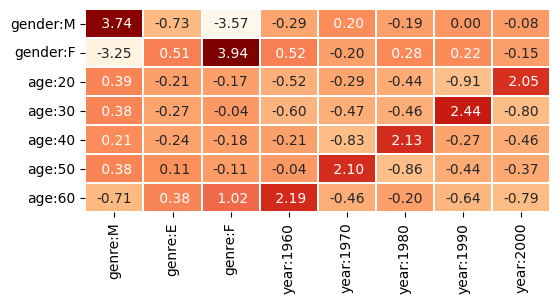

In [14]:
data = np.zeros((len(seq_meta_keys), len(item_meta_keys)))
for i, seq_key in enumerate(seq_meta_keys):
    for j, item_key in enumerate(item_meta_keys):
        data[i][j] = torch.dot(seq_meta[seq_key], item_meta[item_key])

# display_seq_meta_keys = list(map(lambda s: s.replace("gender:", "性別:").replace("M", "男性").replace("F", "女性").replace("age:", "年代:"), seq_meta_keys))
# display_item_meta_keys = list(map(lambda s: s.replace("genre:", "ジャンル:").replace("year:", "発売年:"), item_meta_keys))
display_seq_meta_keys = seq_meta_keys
display_item_meta_keys = item_meta_keys

plt.figure(figsize = (6,7/2))
ax = sns.heatmap(data, linewidth=0.2, annot=True, fmt="5.2f",
    yticklabels=display_seq_meta_keys, xticklabels=display_item_meta_keys, cmap=cmap, cbar=False
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
# plt.subplots_adjust(left=0.12, right=1, bottom=0.33, top=1)
plt.savefig("../data/fig_heatmap.pdf", format="pdf", dpi=300)
# plt.savefig("../data/fig_heatmap.svg", format="svg", dpi=300)

In [15]:
data = np.zeros((len(seq_keys), len(item_meta_keys)))
for i, seq_key in enumerate(seq_keys):
    for j, item_key in enumerate(item_meta_keys):
        data[i][j] = np.dot(seq[seq_key], item_meta[item_key])

display_item_meta_keys = list(map(lambda s: s.replace("genre:", "ジャンル:").replace("year:", "発売年:"), item_meta_keys))
display_seq_meta_keys = ["顧客A", "顧客B", "顧客C"]
display_item_meta_keys = item_meta_keys
display_seq_meta_keys = ["User A", "User B", "User C"]

plt.figure(figsize = (6,2))
ax = sns.heatmap(data, linewidth=0.2, annot=True, fmt="5.2f",
    yticklabels=display_seq_meta_keys, xticklabels=display_item_meta_keys, cmap=cmap, cbar=False
)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.subplots_adjust(left=0.18, right=1, bottom=0.5, top=1)
plt.savefig("../data/fig_heatmap_user.pdf", format="pdf")
plt.savefig("../data/fig_heatmap_user.svg", format="svg", dpi=300)

KeyError: 'u_4_M_20_50_M5'